## Support Vector Machines

Original notebook by: Socorro Dominguez  

In [1]:
!pip install git+https://github.com/mgelbart/plot-classifier

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/mgelbart/plot-classifier to c:\users\user\appdata\local\temp\pip-req-build-j1df_6d9
  Resolved https://github.com/mgelbart/plot-classifier to commit f9224499c1724fcad7b1fe1c933a38aff5f9d8fa
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/mgelbart/plot-classifier 'C:\Users\User\AppData\Local\Temp\pip-req-build-j1df_6d9'


In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC, LinearSVC
import pandas as pd
import numpy as np
from plot_classifier import plot_classifier
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

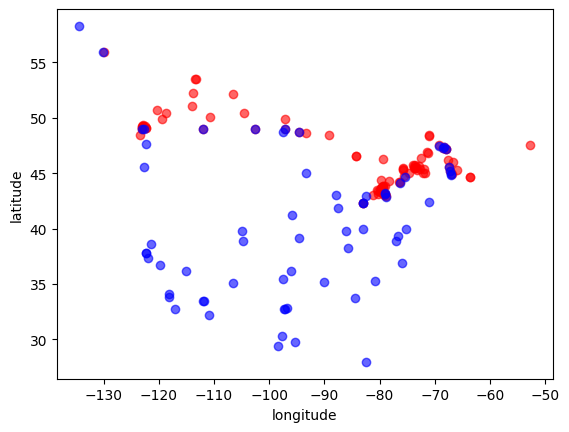

In [3]:
cities_df = pd.read_csv('canada_usa_cities.csv')
train_df, test_df = train_test_split(cities_df, test_size=0.2, random_state=123)
canada = train_df.query('country == "Canada"')
usa = train_df.query('country == "USA"')
plt.scatter(canada["longitude"], canada["latitude"], color="red", alpha=0.6)
plt.scatter(usa["longitude"], usa["latitude"], color="blue", alpha=0.6)
plt.ylabel("latitude")
plt.xlabel("longitude");

In [4]:
# split into training/validation and testing set
X_train, y_train = train_df.drop(columns=['country']).values, train_df['country'].values
X_test, y_test = test_df.drop(columns=['country']).values, test_df['country'].values

Train scores:  0.8383
Test scores:  0.8333


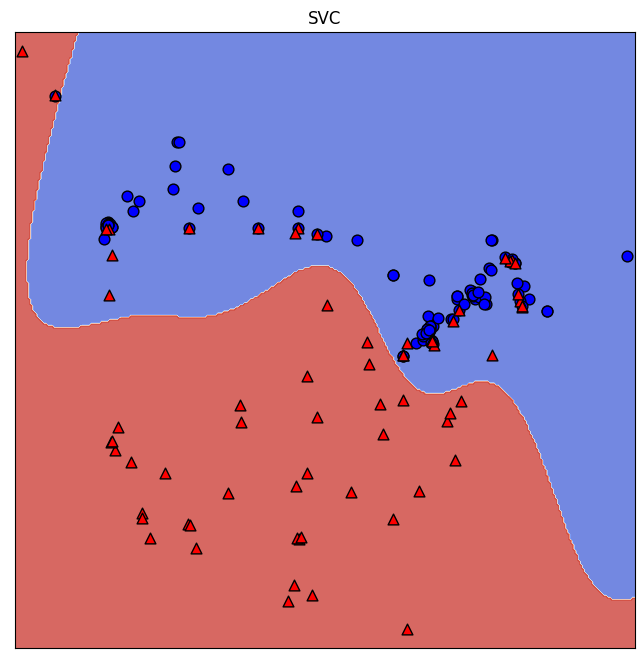

In [5]:
from sklearn.svm import SVC

svm = SVC(gamma=0.01, C=1.0) # Ignore gamma for now
svm.fit(X_train, y_train)
print("Train scores: ", round(svm.score(X_train, y_train), 4))
print("Test scores: ", round(svm.score(X_test, y_test), 4))

# You can think of SVM with RBF kernel as "smooth KNN"
plt.figure(figsize=(8, 8))
plt.title("SVC")
plot_classifier(X_train, y_train, svm, ax=plt.gca());

#### Support vectors 

 - Each training example either is or isn't a "support vector"
   - This gets decided during `fit`

 - **Main insight: the decision boundary only depends on the support vectors.**


SVM is going to leverage the dataset and find the best values **$w^{(*)}$** and **$b^{(*)}$** for parameters $w$ and $b$. 

Then, the learning algorithm is defined as:

>$f(x) = sign(w^{(*)}x + b^{(*)})$

Now, to predict whether a **new** data point is positive or negative using an SVM model, you multiply its feature vector by **$w^{(*)}$**, add **$b^{(*)}$** and take the sign of the result. 

If you get +1, then, the data point belongs to the positive class. 
If you get a -1, then the data point belongs to the negative class. 

We want a hyperplane that separates positive examples from negative ones with the largest margin. 

If the margin or decision boundary is large, it contributes to a better generalization, that is how well the model will classify new examples in the future. 

For two-dimensional feature vectors, we can easily visualize the solution. The blue and orange circles represent, respectively, positive and negative examples. The line given by $wx + b = 0$ is the decision boundary.

That’s how Support Vector Machines work. This particular version of the algorithm builds the so-called linear model. It’s called linear because the decision boundary is a straight line (or a plane, or a hyperplane).

In [6]:
# demo with a synthetic data set
n = 20
X = np.random.randn(n,2)
y = np.random.choice((-1,+1),size=n)
X[y>0,0] -= 2
X[y>0,1] += 2

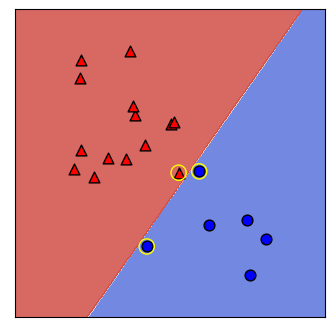

In [7]:
svm = SVC(kernel="linear", C=1e6) # ignore the C=1e6 for now
svm.fit(X,y)

plt.figure(figsize=(4,4))

plot_classifier(X, y, svm, ax=plt.gca())
plt.scatter(*svm.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);

- The support vectors (SVs) are shown in yellow.
- These are the examples that "support" the boundary. 

Below: let's try removing all other examples, keeping only the SVs.

In [8]:
sv = svm.support_
not_sv = list(set(range(n)) - set(sv))

[[-6.02935418  3.00432945]]
[[-6.02968066  3.00443012]]
The coefficients are the same!


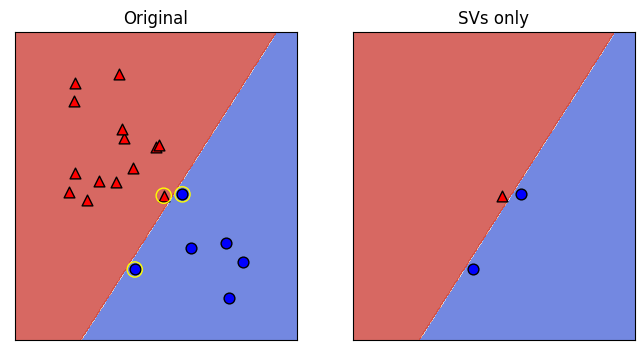

In [9]:
# remove all non-support vectors
X3 = np.delete(X,not_sv,0)
y3 = np.delete(y,not_sv,0)

svm3 = SVC(kernel="linear", C=1e6)
svm3.fit(X3,y3)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_classifier(X,y,svm, ax=plt.gca())
plt.scatter(*svm.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);
plt.title("Original");
plt.subplot(1,2,2)
plot_classifier(X3,y3,svm3, ax=plt.gca(), lims=(X[:,0].min()-1,X[:,0].max()+1,X[:,1].min()-1,X[:,1].max()+1))
plt.title("SVs only");

print(svm.coef_)
print(svm3.coef_)
print("The coefficients are the same!")

[[-6.02935418  3.00432945]]
[[-0.5640087   1.37754237]]


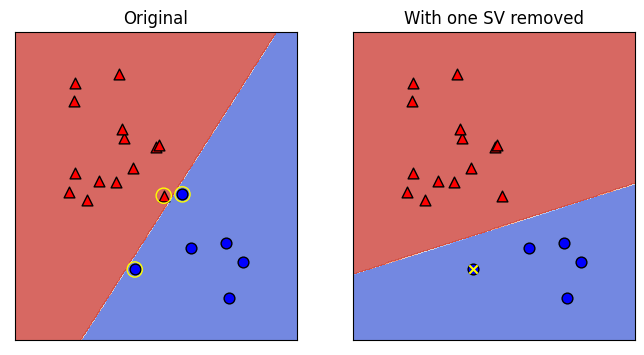

In [10]:
# remove a support vector
X2 = np.delete(X,sv[1],0)
y2 = np.delete(y,sv[1],0)

svm2 = SVC(kernel="linear", C=1e6)
svm2.fit(X2,y2);

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_classifier(X,y,svm, ax=plt.gca())
plt.scatter(*svm.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);
plt.title("Original");

plt.subplot(1,2,2)
plot_classifier(X2,y2,svm2, ax=plt.gca())
# plt.scatter(*svm2.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);
plt.scatter(svm.support_vectors_[0,0], svm.support_vectors_[0,1], marker="x", c="yellow")
plt.title("With one SV removed");

print(svm.coef_)
print(svm2.coef_)

- The **margin** is the distance from the boundary to the nearest point(s).
- Support vector machines try to maximize the margin while minimizing misclassification.
- Intuitively, more margin is good because it leaves more "room" before we make an error.


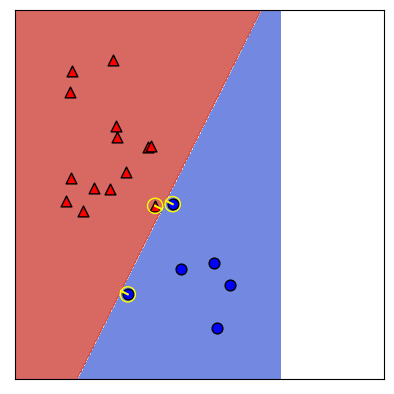

In [11]:
plt.figure()
plot_classifier(X, y, svm, ax=plt.gca());
plt.scatter(*svm.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);
plt.axis('equal');
plt.axis('square');

def SV_proj(svm):
    v = svm.support_vectors_
    s = np.array([svm.coef_.flatten()[1], -svm.coef_.flatten()[0]])
    w = svm.coef_
    return (v@s[:,None])/(s@s) * s - w/(w@w.T)*svm.intercept_
proj = SV_proj(svm)

for i in range(len(proj)):
    p = proj[i]
    sv = svm.support_vectors_[i]
    plt.plot((p[0],sv[0]),(p[1],sv[1]), 'yellow')

### Hyperparameters of SVM 

- Key hyperparameters of `rbf` SVM are
    - `gamma`
    - `C`
    
- We are not equipped to understand the meaning of these parameters at this point but you are expected to describe their relation to the fundamental tradeoff. 

See [`scikit-learn`'s explanation of RBF SVM parameters](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html). 

### Relation of `gamma` and the fundamental trade-off

- `gamma` controls the complexity (fundamental trade-off), just like other hyperparameters we've seen.
  - larger `gamma` $\rightarrow$ more complex
  - smaller `gamma` $\rightarrow$ less complex

### Relation of `C` and the fundamental trade-off

- `C` _also_ affects the fundamental tradeoff
    - larger `C` $\rightarrow$ more complex 
    - smaller `C` $\rightarrow$ less complex 

### Dealing with Inherent Non-Linearity
SVM can be adapted to work with datasets that cannot be separated by a hyperplane in its original space. Indeed, if we manage to transform the original space into a space of higher dimensionality, we could hope that the examples will become linearly separable in this transformed space. The image below shows this process in action: the image on the left is the data in the original 2 dimensions and the one on the right is a projection into 3 dimensions. In this example, in 3 dimensions, it is easy for the algorithm to find the plane that separates the two classes. The circle in the right image is the 3 dimensional decision boundary projected back into the original 2 dimensions, which is why it is a circle. 

Add extra dimension | Projection back to 2D
- | - 
![image.png](img/SVM_kernel.png) | ![image.png](img/SVM_circle.png)

By using the **kernel trick**, we can get rid of a costly transformation of original feature vectors into higher dimensional vectors and avoid computing their dot-product.

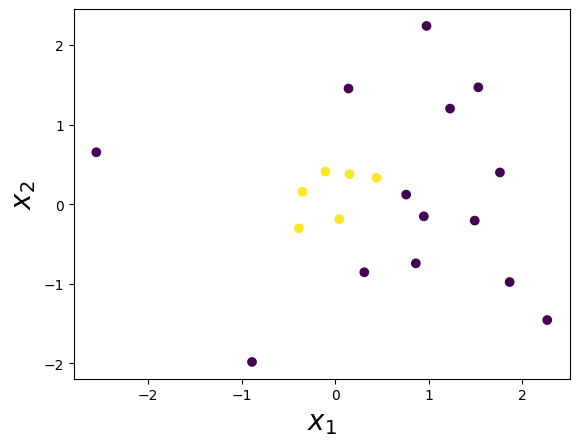

In [12]:
n = 20
d = 2
np.random.seed(0)
X = np.random.randn(n,d)
y = np.sum(X**2,axis=1) < 0.4

plt.scatter(X[:,0], X[:,1], c=y);
plt.xlabel("$x_{1}$", fontsize=20);
plt.ylabel("$x_{2}$", fontsize=20);

Training accuracy 0.7


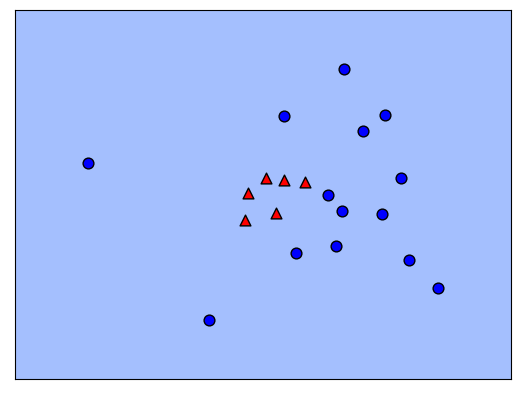

In [13]:
svm = SVC(kernel="linear")
svm.fit(X,y)

plot_classifier(X,y,svm)

print("Training accuracy", svm.score(X,y))

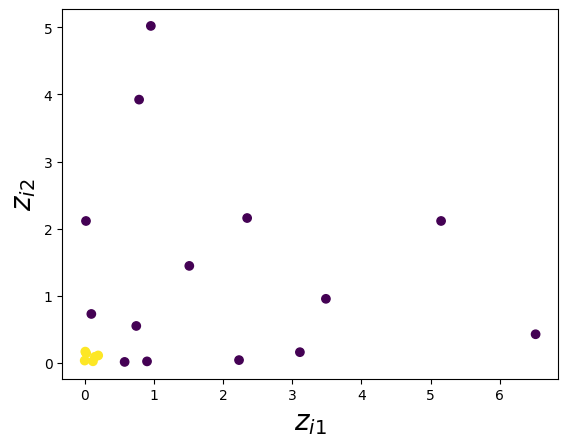

In [14]:
Z = X**2

plt.scatter(Z[:,0], Z[:,1], c=y);
plt.xlabel("$z_{i1}$", fontsize=20);
plt.ylabel("$z_{i2}$", fontsize=20);

Training accuracy 1.0


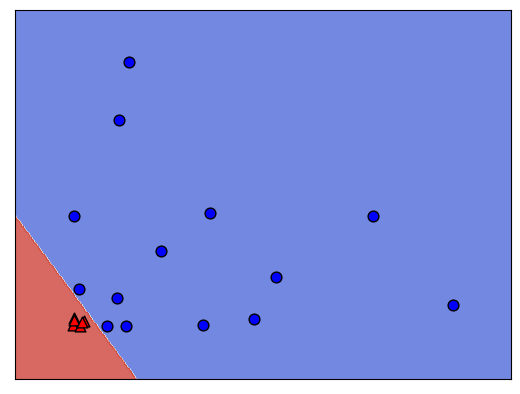

In [15]:
svm = SVC(kernel="linear", C=100)
svm.fit(Z,y)

plot_classifier(Z,y,svm)

print("Training accuracy", svm.score(Z,y))

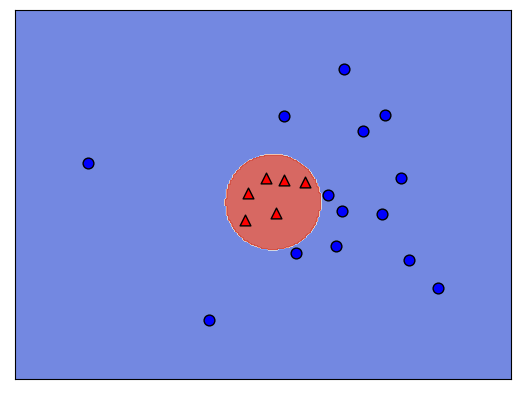

In [16]:
plot_classifier(X, y, svm, transformation=lambda X: X**2);

Training accuracy 0.85


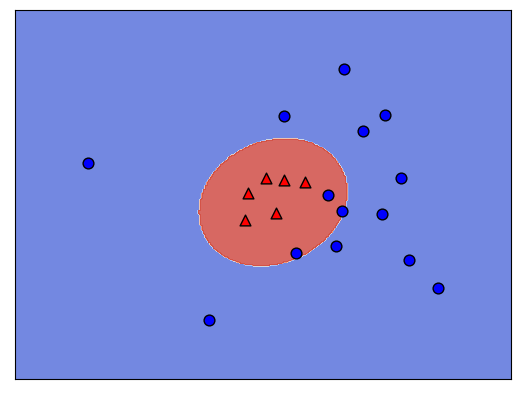

In [17]:
svm = SVC(kernel="poly", degree=2)
svm.fit(X,y)

plot_classifier(X,y,svm)

print("Training accuracy", svm.score(X,y))

Training accuracy 1.0


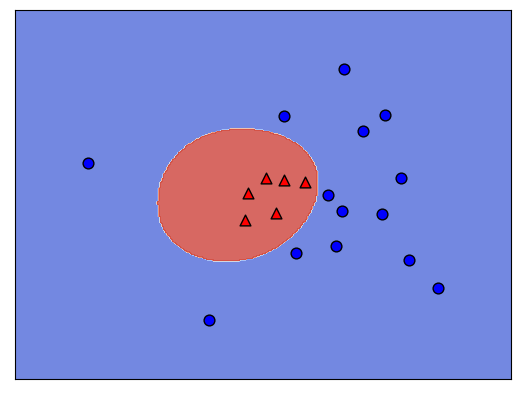

In [18]:
svm = SVC(kernel="rbf")
svm.fit(X,y)

plot_classifier(X,y,svm)

print("Training accuracy", svm.score(X,y))